# Supervised Learning Project

### Import all the necessary libraries

Necessary libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Necessary libaries for Machine Learning

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Load both the datasets and append the datasets

In [3]:
df1 = pd.read_csv('adult.data', header = None, na_values = ' ?' )
df2 = pd.read_csv('adult.test', header = None, na_values = ' ?' )
df = df1.append(df2, ignore_index = True)

In [4]:
df.rename(columns = {0 : 'age', 1 : 'workclass', 2: 'fnlwgt', 3 : 'education', 4 : 'education-num', 5 : 'marital-status', 6: 'occupation', 7 : 'relationship', 8 : 'race', 9 : 'sex', 10 : 'capital-gain', 11 : 'capital-loss', 12 : 'hours-per-week', 13 : 'native-country', 14 : 'income'}, inplace = True)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [6]:
row, column = df.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 48842 rows and 15 columns


In [7]:
print('Null values:\n', df.isnull().sum())

Null values:
 age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


It can be seen that there are some missing values.

In [8]:
print('The data type of each attribute: \n')
df.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Getting rid of different values in the Income (target) column

In [9]:
df.income.replace([' <=50K.', ' <=50K'], '<=50K', inplace = True)
df.income.replace([' >50K', ' >50K.'], '>50K', inplace = True)
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [10]:
df.income.value_counts().to_frame()

,income
<=50K,37155
>50K,11687


The dataset we have is highly in favour of the income group <=50K. This skewness may create a bias in the model.

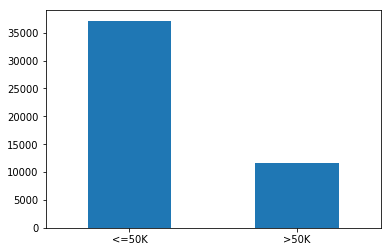

In [11]:
df.income.value_counts().plot(kind = 'bar', rot = 0)

Data Visualization of columns

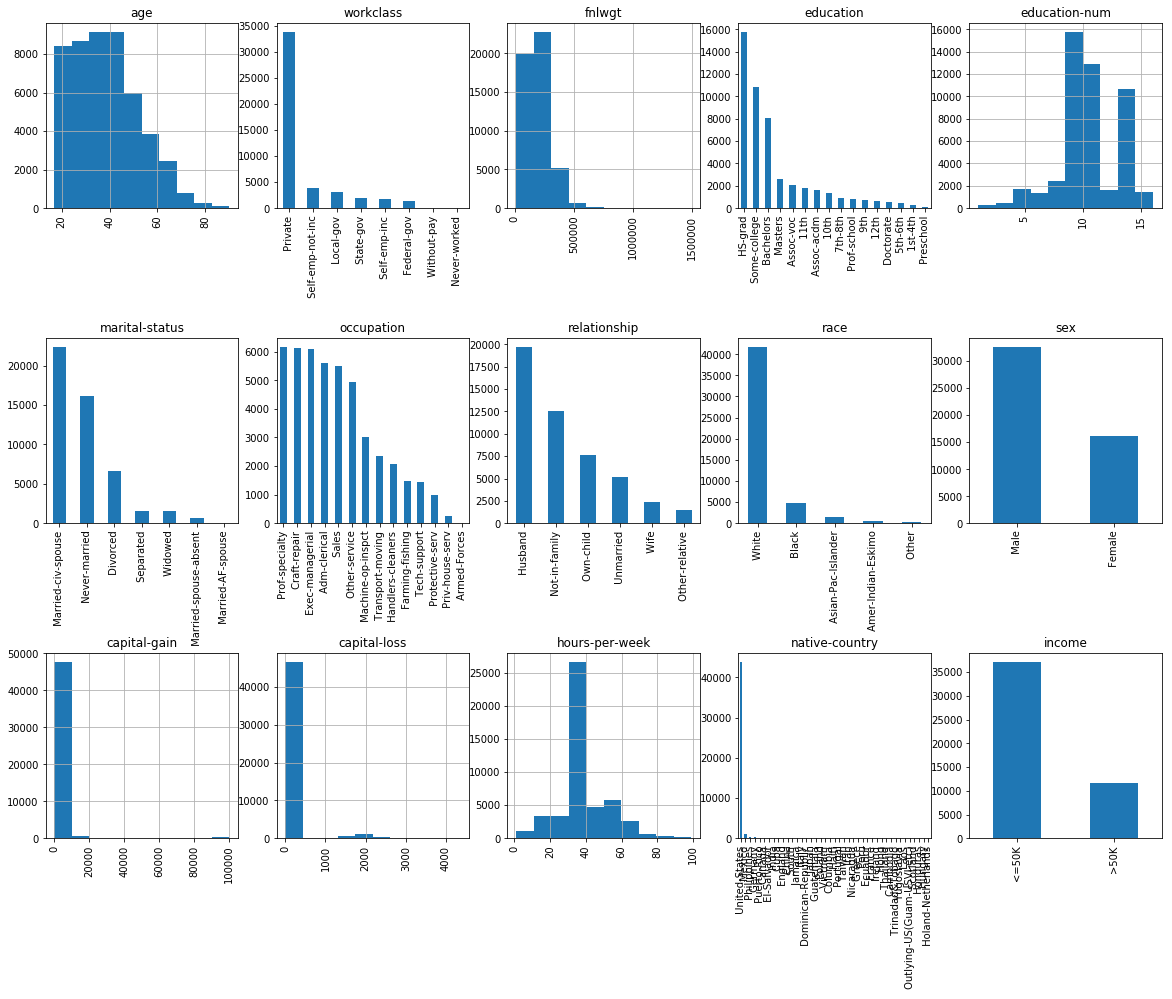

In [12]:
fig = plt.figure(figsize = (20, 15))
cols = 5
rows = (float(df.shape[1]) / cols)
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind = 'bar', axes = ax)
    else:
        df[column].hist(axes = ax)
        plt.xticks(rotation = 'vertical')
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)

In [13]:
((df['native-country'].value_counts() / df.shape[0]) * 100).head(10)

 United-States    89.742435
 Mexico            1.947095
 Philippines       0.603988
 Germany           0.421768
 Puerto-Rico       0.376725
 Canada            0.372630
 El-Salvador       0.317350
 India             0.309160
 Cuba              0.282544
 England           0.260022
Name: native-country, dtype: float64

89.74% of the samples are for people from the US. Mexico comes next with less than 2%.

Conversion of 'object' variables into 'Categorical' variables

In [14]:
print('The data type of each attribute after conversion into categorical variables: \n')
for cols in df.columns: # Loop through all columns in the dataframe
    if df[cols].dtype == 'object':
        df[cols] = pd.Categorical(df[cols])
df.info()

The data type of each attribute after conversion into categorical variables: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null category
fnlwgt            48842 non-null int64
education         48842 non-null category
education-num     48842 non-null int64
marital-status    48842 non-null category
occupation        46033 non-null category
relationship      48842 non-null category
race              48842 non-null category
sex               48842 non-null category
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null category
income            48842 non-null category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


Checking the composition of age column- graphically

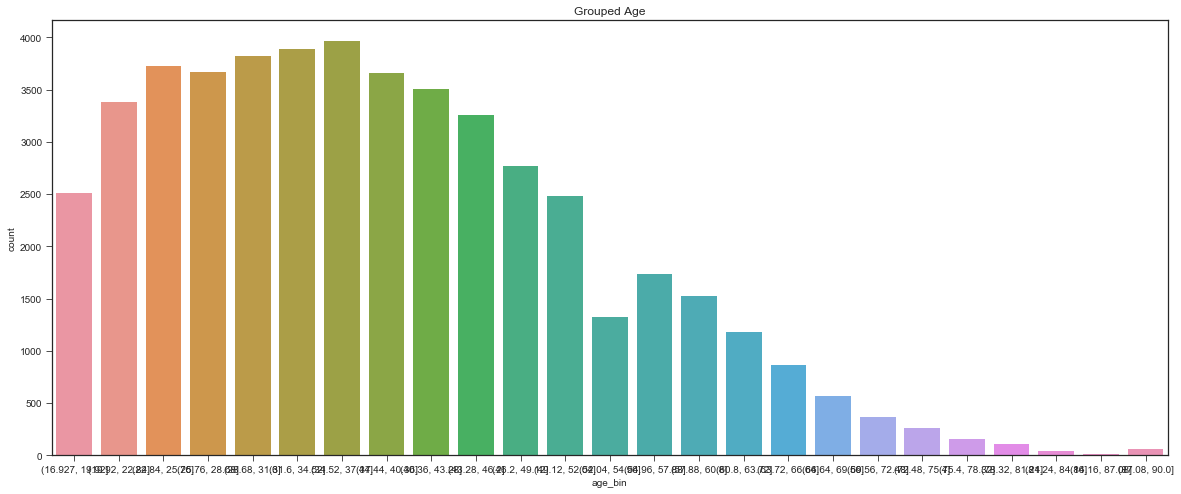

In [15]:
df['age_bin'] = pd.cut(df['age'], 25)
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20, 8)) 
plt.title(label = 'Grouped Age')
sns.countplot(x = 'age_bin', data = df)

Comparison of Age and Income 

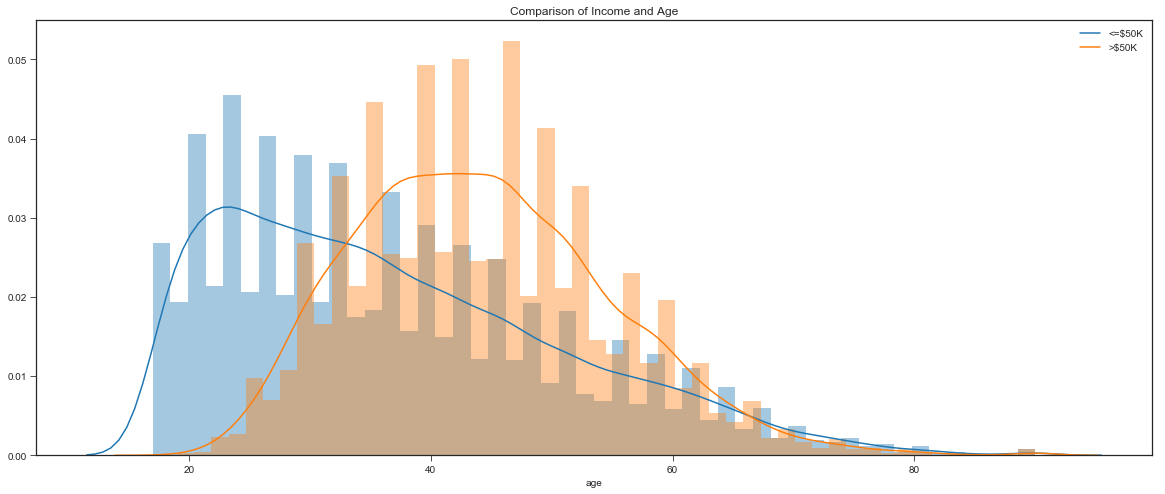

In [16]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20, 8))
plt.title(label = 'Comparison of Income and Age')
sns.distplot(df[df['income'] == '<=50K']['age'], kde_kws = {'label': '<=$50K'})
sns.distplot(df[df['income'] == '>50K']['age'], kde_kws = {'label': '>$50K'})

In [17]:
df.groupby('education').nunique()['education-num']

education
 10th            1
 11th            1
 12th            1
 1st-4th         1
 5th-6th         1
 7th-8th         1
 9th             1
 Assoc-acdm      1
 Assoc-voc       1
 Bachelors       1
 Doctorate       1
 HS-grad         1
 Masters         1
 Preschool       1
 Prof-school     1
 Some-college    1
Name: education-num, dtype: int64

As we can see these two columns actually represent the same features, but encoded as strings and as numbers. We don’t need the string representation, so we can just delete this column to avoid multi-collinearity.

In [18]:
df.drop(axis = 1, columns = 'age_bin', inplace = True)
df.drop(axis = 1, columns = 'education', inplace = True)
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Replacing the missing values with the mode of each column

In [19]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace = True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace = True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace = True)

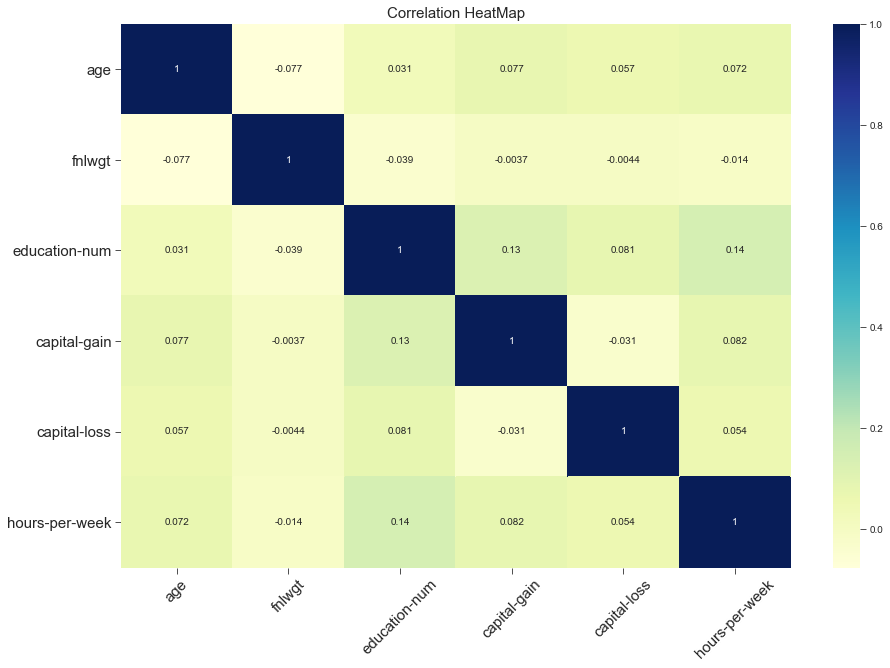

In [20]:
correlation = df.corr()
plt.figure(figsize = (15, 10))
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(correlation, annot = True, cmap = 'YlGnBu')

In [21]:
# dropping fnlwgt column
df.drop(axis = 1, columns = 'fnlwgt', inplace = True)

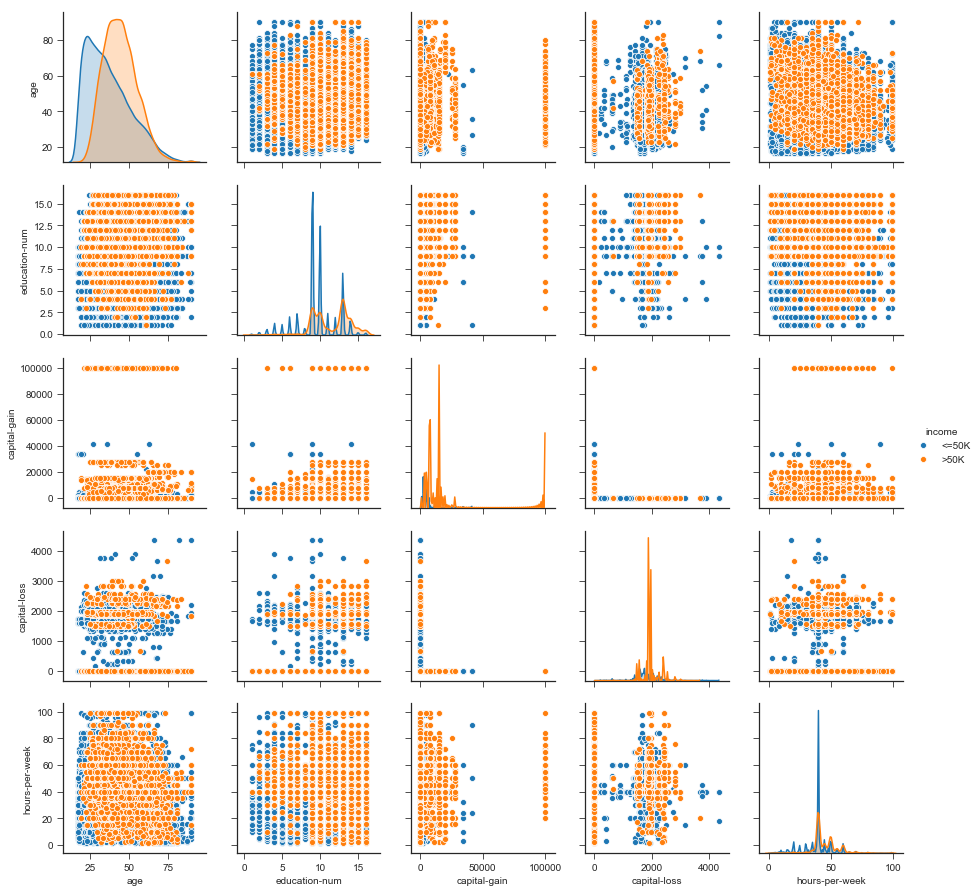

In [22]:
sns.pairplot(df, diag_kind = 'kde', hue = 'income')

Copying the dataset for encoding.

In [23]:
df_encoded = df.copy(deep = True)

Encoding the values in each categorical column

In [24]:
enc = LabelEncoder()
df_encoded['workclass'] = enc.fit_transform(df_encoded['workclass']).astype(int)
df_encoded['marital-status'] = enc.fit_transform(df_encoded['marital-status']).astype(int)
df_encoded['occupation'] = enc.fit_transform(df_encoded['occupation']).astype(int)
df_encoded['relationship'] = enc.fit_transform(df_encoded['relationship']).astype(int)
df_encoded['race'] = enc.fit_transform(df_encoded['race']).astype(int)
df_encoded['native-country'] = enc.fit_transform(df_encoded['native-country']).astype(int)
df_encoded['sex'] = enc.fit_transform(df_encoded['sex']).astype(int)
df_encoded['income'] = enc.fit_transform(df_encoded['income']).astype(int)
df_encoded.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [25]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
workclass,48842.0,3.099668,1.110810,0.0,3.0,3.0,3.0,7.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842.0,2.618750,1.507703,0.0,2.0,2.0,4.0,6.0
occupation,48842.0,6.152819,3.968837,0.0,3.0,7.0,9.0,13.0
relationship,48842.0,1.443287,1.602151,0.0,0.0,1.0,3.0,5.0
race,48842.0,3.668052,0.845986,0.0,4.0,4.0,4.0,4.0
sex,48842.0,0.668482,0.470764,0.0,0.0,1.0,1.0,1.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0


The columns - capital-gain & capital-loss have extreme outliers.

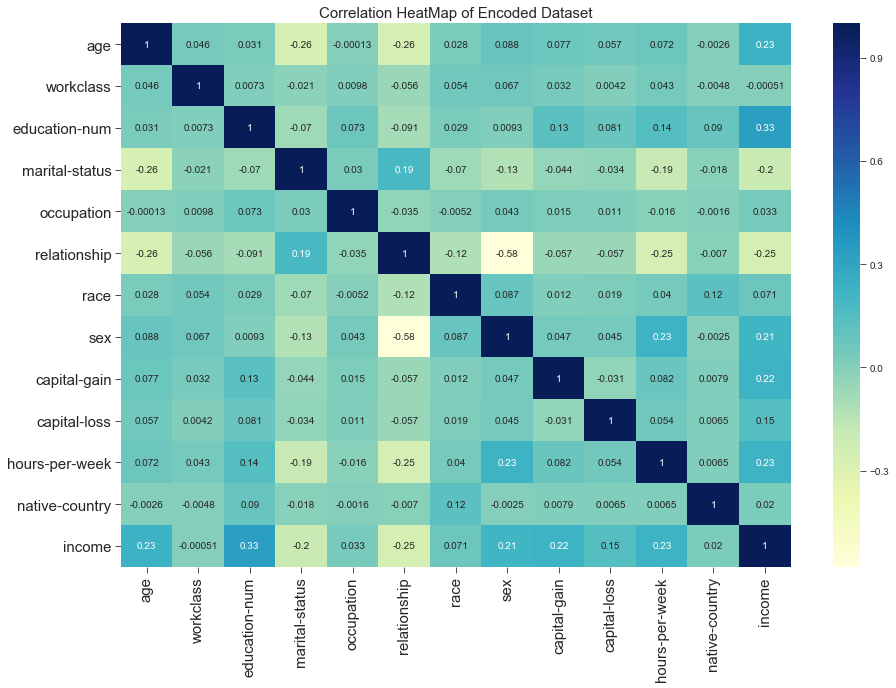

In [26]:
correlation = df_encoded.corr()
plt.figure(figsize = (15, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Correlation HeatMap of Encoded Dataset', fontsize = 15)
sns.heatmap(correlation, annot = True, cmap = 'YlGnBu')

Separating target column as 'y'

In [27]:
X = df_encoded.loc[:, df_encoded.columns != 'income']
y = df_encoded.income

In [28]:
X_col = X.columns
X_col

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country'],
      dtype='object')

Text(0.5, 1.0, 'Correlation with Income')

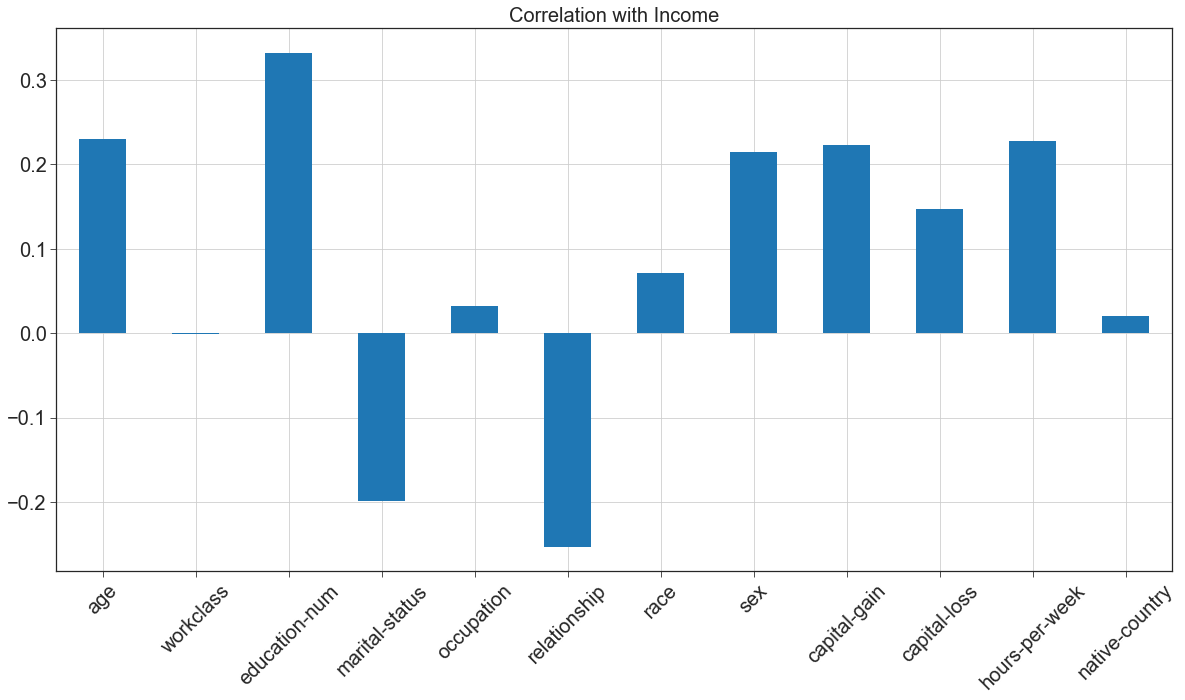

In [29]:
X.corrwith(y).plot.bar(
        figsize = (20, 10), fontsize = 20, 
        rot = 45, grid = True)
plt.title('Correlation with Income', fontsize = 20)

Using Standard Scaler to standardize the values of each column. This is required in order to bring the input variables on same scale, which might be on different scales in the raw form.

In [30]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X))
X_std.columns = X_col #the column names are passed to the standardized dataframe
X_std.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.025996,2.611034,1.136512,0.916138,-1.550298,-0.276685,0.392384,0.70422,0.146932,-0.217127,-0.034087,0.259694
1,0.828308,1.710780,1.136512,-0.410397,-0.794402,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-2.213032,0.259694
2,-0.046942,-0.089727,-0.419335,-1.736932,-0.290471,-0.276685,0.392384,0.70422,-0.144804,-0.217127,-0.034087,0.259694
3,1.047121,-0.089727,-1.197259,-0.410397,-0.290471,-0.900852,-1.971746,0.70422,-0.144804,-0.217127,-0.034087,0.259694
4,-0.776316,-0.089727,1.136512,-0.410397,0.717391,2.219984,-1.971746,-1.42001,-0.144804,-0.217127,-0.034087,-5.377402


Splitting the data into training (70%) and testing set (30%). 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 10)

In [32]:
rtr, ctr = X_train.shape
print('The training set comprises of -', rtr, 'rows and', ctr, '- columns.')

The training set comprises of - 34189 rows and 12 - columns.


In [33]:
rt, ct = X_test.shape
print('The test set comprises of -', rt, 'rows and', ct, '- columns.')

The test set comprises of - 14653 rows and 12 - columns.


### Gaussian Naive Bayes Model

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy Score of Training Data:  0.803504051010559

Accuracy Score of Test Data:  0.8032484815396165

Classification Report of Naive Bayes Model:
                precision    recall  f1-score   support

           0       0.82      0.95      0.88     11111
           1       0.69      0.33      0.45      3542

   micro avg       0.80      0.80      0.80     14653
   macro avg       0.76      0.64      0.67     14653
weighted avg       0.79      0.80      0.78     14653


Mean Absolute Error of Naive Bayes:
 0.19675151846038355

Confusion Matrix of Naive Bayes Model:
  [[10591   520]
 [ 2363  1179]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap')

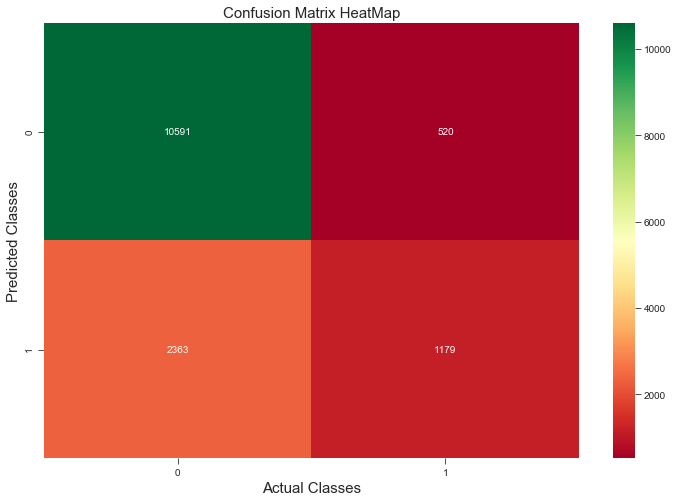

In [34]:
model_NB = GaussianNB()

#fitting the model
model_NB.fit(X_train, y_train)
print(model_NB)

# make predictions
y_predictNB = model_NB.predict(X_test)

#evaluate the accuracy
print('\nAccuracy Score of Training Data: ', model_NB.score(X_train, y_train))
modelNB_score = accuracy_score(y_test, y_predictNB)
print('\nAccuracy Score of Test Data: ', modelNB_score)

cfm_NB = confusion_matrix(y_test, y_predictNB)

# summarize the fit of the model
print('\nClassification Report of Naive Bayes Model:\n ', classification_report(y_test, y_predictNB))
print('\nMean Absolute Error of Naive Bayes:\n', mean_absolute_error(y_test, y_predictNB))
print('\nConfusion Matrix of Naive Bayes Model:\n ', cfm_NB)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(cfm_NB, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15)

In [35]:
precision_NB, recall_NB, f1_score_NB, support = precision_recall_fscore_support(y_test, y_predictNB, average = 'macro')
print('Precision Score :', '%0.2f' % precision_NB)
print('Recall Score :', '%0.2f' % recall_NB)
print('F1-Score:', '%0.2f' % f1_score_NB)
print('Accuracy Score :','%0.2f' % modelNB_score)

Precision Score : 0.76
Recall Score : 0.64
F1-Score: 0.67
Accuracy Score : 0.80


### Logistic Regression Model

        age  workclass  education-num  marital-status  occupation  \
0  0.462204  -0.104158       0.864206       -0.337705   -0.029615   

   relationship     race       sex  capital-gain  capital-loss  \
0     -0.243536  0.10448  0.397949      2.275709      0.256148   

   hours-per-week  native-country  intercept  
0        0.358842         0.00775  -1.513565  


Accuracy Score of Training Data:  0.8248559478194741

Accuracy Score of Test Data:  0.8264519211083055

Classification Report of Logistic Regression Model:
                precision    recall  f1-score   support

           0       0.85      0.94      0.89     11111
           1       0.72      0.47      0.56      3542

   micro avg       0.83      0.83      0.83     14653
   macro avg       0.78      0.70      0.73     14653
weighted avg       0.82      0.83      0.81     14653


Mean Absolute Error of Logistic Regression:
 0.17354807889169455

Confusion Matrix of Logistic Regression: 
 [[10459   652]
 [ 1891  1651]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap')

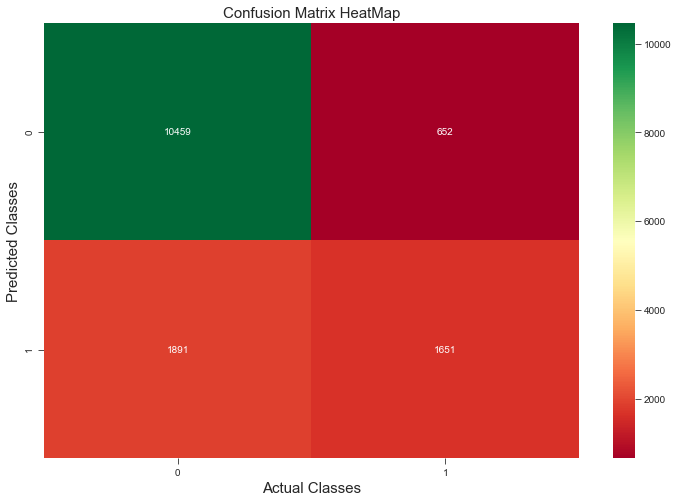

In [36]:
modelLR = LogisticRegression(C = 0.1, solver = 'liblinear')

#fitting the model
modelLR.fit(X_train, y_train)

#predicting
y_predictLR = modelLR.predict(X_test)

coef_df = pd.DataFrame(modelLR.coef_, columns = X_col)
coef_df['intercept'] = modelLR.intercept_
print(coef_df)

cfm_LR = confusion_matrix(y_test, y_predictLR)
# evaluate accuracy
print('\n\nAccuracy Score of Training Data: ', modelLR.score(X_train, y_train))
modelLR_score = accuracy_score(y_test, y_predictLR)
print('\nAccuracy Score of Test Data: ', modelLR_score)
print('\nClassification Report of Logistic Regression Model:\n ', classification_report(y_test, y_predictLR))
print('\nMean Absolute Error of Logistic Regression:\n', mean_absolute_error(y_test, y_predictLR))
print('\nConfusion Matrix of Logistic Regression: \n', cfm_LR)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(cfm_LR, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15)

In [37]:
precision_LR, recall_LR, f1_score_LR, support = precision_recall_fscore_support(y_test, y_predictLR, average = 'macro')
print('Precision Score :', '%0.2f' % precision_LR) 
print('Recall Score :', '%0.2f' % recall_LR)
print('F1-Score:', '%0.2f' % f1_score_LR)
print('Accuracy Score :','%0.2f' % modelLR_score)

Precision Score : 0.78
Recall Score : 0.70
F1-Score: 0.73
Accuracy Score : 0.83


### K- Nearest Neighbour Classifier

In [38]:
# creating odd list of K for KNN
myList = list(range(1, 30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [39]:
# empty list that will hold accuracy scores
accuracy_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    # predict the response
    y_predictKNN = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_predictKNN)
    accuracy_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in accuracy_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is: ', optimal_k)

The optimal number of neighbors is:  15


Accuracy Score of Training Data:  0.8589604843663167

Accuracy Score of Test Data:  0.8457653722787143

Classification Report of KNN Model:
                precision    recall  f1-score   support

           0       0.88      0.92      0.90     11111
           1       0.72      0.60      0.65      3542

   micro avg       0.85      0.85      0.85     14653
   macro avg       0.80      0.76      0.78     14653
weighted avg       0.84      0.85      0.84     14653


Mean Absolute Error of KNN:
 0.15423462772128574

Confusion Matrix of KNN:
 [[10262   849]
 [ 1411  2131]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap')

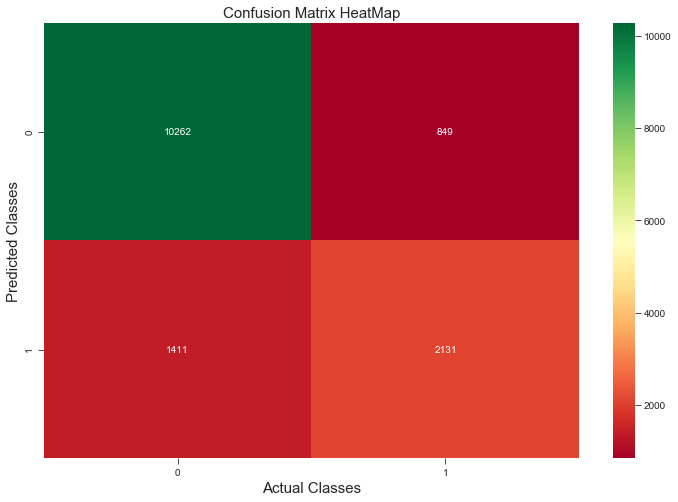

In [40]:
#Using optimal_k from above as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = optimal_k)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_predictKNN = knn.predict(X_test)

# evaluate accuracy
print('Accuracy Score of Training Data: ', knn.score(X_train, y_train))
modelKNN_score = accuracy_score(y_test,y_predictKNN)

cfm_KNN = confusion_matrix(y_test, y_predictKNN)
print('\nAccuracy Score of Test Data: ', modelKNN_score)
print('\nClassification Report of KNN Model:\n ', classification_report(y_test, y_predictKNN))
print('\nMean Absolute Error of KNN:\n', mean_absolute_error(y_test, y_predictKNN))
print('\nConfusion Matrix of KNN:\n', cfm_KNN)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(cfm_KNN, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15)

In [41]:
precision_KNN, recall_KNN, f1_score_KNN, support = precision_recall_fscore_support(y_test, y_predictKNN, average = 'macro')
print('Precision Score :', '%0.2f' % precision_KNN)
print('Recall Score :', '%0.2f' % recall_KNN)
print('F1-Score :', '%0.2f' % f1_score_KNN)
print('Accuracy Score :','%0.2f' % modelKNN_score)

Precision Score : 0.80
Recall Score : 0.76
F1-Score : 0.78
Accuracy Score : 0.85


### Support Vector Classifier

Accuracy Score of Training Data:  0.8562988095586299

Accuracy Score of Test Data: 0.8525216679178326

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       0.87      0.95      0.91     11111
           1       0.77      0.55      0.65      3542

   micro avg       0.85      0.85      0.85     14653
   macro avg       0.82      0.75      0.78     14653
weighted avg       0.85      0.85      0.84     14653


Mean Absolute Error of SVC:
 0.14747833208216748

Confusion Matrix of SVC:
 [[10528   583]
 [ 1578  1964]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap')

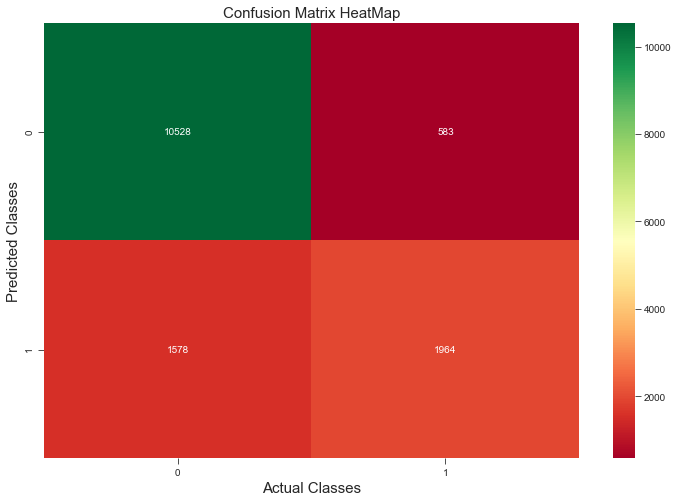

In [42]:
svc_model = SVC(kernel = 'rbf', gamma = 'scale')

# fitting the model
svc_model.fit(X_train, y_train)

# predict the response
y_predictSVC = svc_model.predict(X_test)

print('Accuracy Score of Training Data: ', svc_model.score(X_train, y_train))

cfm_SVC = confusion_matrix(y_test, y_predictSVC)


# evaluate accuracy
modelSVC_score_rbf = accuracy_score(y_test, y_predictSVC)
print('\nAccuracy Score of Test Data:', modelSVC_score_rbf)
print('\nClassification Report of SVC Model:\n ', classification_report(y_test, y_predictSVC))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_test, y_predictSVC))
print('\nConfusion Matrix of SVC:\n', cfm_SVC)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(cfm_SVC, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15)

In [43]:
precision_SVC, recall_SVC, f1_score_SVC, support = precision_recall_fscore_support(y_test, y_predictSVC, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC)
print('Recall Score :', '%0.2f' % recall_SVC)
print('F1-Score :', '%0.2f' % f1_score_SVC)
print('Accuracy Score :','%0.2f' % modelSVC_score_rbf)

Precision Score : 0.82
Recall Score : 0.75
F1-Score : 0.78
Accuracy Score : 0.85


### Result Dataframe (in increasing order of Accuracy Score)

In [44]:
modellists = []
modellists.append(['Gaussian Naive Bayes', modelNB_score * 100, recall_NB * 100, precision_NB * 100])
modellists.append(['Logistic Regression', modelLR_score * 100, recall_LR * 100, precision_LR * 100])
modellists.append(['K-Nearest Neighbour', modelKNN_score * 100, recall_KNN * 100, precision_KNN * 100])
modellists.append(['Support Vector Classifier', modelSVC_score_rbf * 100, recall_SVC * 100, precision_SVC * 100])
model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Score', 'Recall Score', 'Precision Score'])
model_df

,Model,Accuracy Score,Recall Score,Precision Score
0,Gaussian Naive Bayes,80.324848,64.303116,75.576146
1,Logistic Regression,82.645192,70.372012,78.188680
2,K-Nearest Neighbour,84.576537,76.261336,79.711172
3,Support Vector Classifier,85.252167,75.100923,82.037734


For this dataset, Support Vector Classifier gives the best accuracy score followed by K- Nearest Neighbour.